In [32]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
##### option 1: long format
# columns are id1, id2, (N), GRM value

In [2]:
kinship_file="/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/grm_long.csv"
K = pd.read_csv(kinship_file, index_col=0)

In [15]:
K.head()

,id1,id2,grm
1,1,1,0.995624
2,2,1,-0.001683
3,2,2,0.990942
4,3,1,-0.000266
5,3,2,0.004440


In [11]:
assert all(K['id1'].unique() == K['id2'].unique()) #symmetric matrix, donors x donors

In [17]:
# low triangle
K_wide = K.set_index(['id1','id2']).unstack()
K_wide.head()

grm                                                              \
id2      1         2         3         4         5    6    7    8    9      
id1                                                                         
1    0.995624       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN   
2   -0.001683  0.990942       NaN       NaN       NaN  NaN  NaN  NaN  NaN   
3   -0.000266  0.004440  0.995393       NaN       NaN  NaN  NaN  NaN  NaN   
4    0.001418 -0.003154 -0.004177  0.987741       NaN  NaN  NaN  NaN  NaN   
5   -0.006332  0.001034  0.002940  0.002893  0.995691  NaN  NaN  NaN  NaN   

          ...                                                    
id2 10    ... 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086  
id1       ...                                                    
1    NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2    NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3    NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4    NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5    NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 1086 columns]

In [20]:
kinship_ids_file="/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/grm_ids.csv"
K_idx = pd.read_csv(kinship_ids_file, index_col=0)
K_idx.shape

(1086, 2)

In [19]:
K_idx.head()

,FAMID,INDID
1,1,1
2,2,2
3,3,3
4,4,4
5,6,6


In [29]:
for i in range(K_wide.shape[0]):
    for j in range(i,K_wide.shape[1]):
        K_wide.values[i,j] = K_wide.values[j,i]

In [30]:
K_wide.head()

grm                                                              \
id2      1         2         3         4         5         6         7      
id1                                                                         
1    0.995624 -0.001683 -0.000266  0.001418 -0.006332 -0.004012 -0.004219   
2   -0.001683  0.990942  0.004440 -0.003154  0.001034 -0.005874  0.000771   
3   -0.000266  0.004440  0.995393 -0.004177  0.002940  0.000986 -0.003273   
4    0.001418 -0.003154 -0.004177  0.987741  0.002893  0.004163  0.001882   
5   -0.006332  0.001034  0.002940  0.002893  0.995691 -0.003295 -0.005520   

                                   ...                                \
id2      8         9         10    ...      1077      1078      1079   
id1                                ...                                 
1    0.000371  0.001088 -0.003356  ... -0.006779 -0.006387 -0.004066   
2   -0.000825 -0.006089 -0.000778  ...  0.000830 -0.005683 -0.008176   
3   -0.004580  0.001879 -0.005853  ... -0.005173 -0.004810 -0.004827   
4   -0.006195 -0.003367  0.000826  ... -0.007955 -0.004290  0.000174   
5    0.006375 -0.002779  0.007748  ...  0.004857 -0.000795 -0.000944   

                                                                           
id2      1080      1081      1082      1083      1084      1085      1086  
id1                                                                        
1   -0.002836 -0.001338 -0.006830 -0.004347 -0.003641  0.005666  0.001916  
2   -0.004223 -0.004807 -0.001457 -0.006391  0.003178 -0.000084 -0.002741  
3   -0.001408 -0.000999  0.003177  0.000140 -0.004222  0.002664  0.003391  
4   -0.001351 -0.001596 -0.006001  0.003051 -0.002020 -0.004859 -0.002908  
5   -0.006320 -0.002510 -0.000913 -0.002389 -0.002749 -0.001777 -0.002543  

[5 rows x 1086 columns]

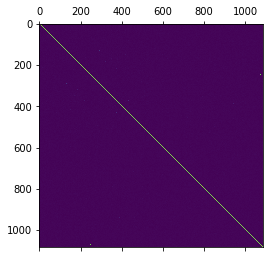

In [33]:
plt.matshow(K_wide)

In [38]:
K_wide.index = K_idx['INDID'].values
K_wide.columns = K_idx['INDID'].values

In [39]:
K_wide.head()

,1,2,3,4,6,7,8,9,10,11,...,566_2,845_2,846_2,847_2,848_2,914_2,915_2,932_2,926_2,920_2
1,0.995624,-0.001683,-0.000266,0.001418,-0.006332,-0.004012,-0.004219,0.000371,0.001088,-0.003356,...,-0.006779,-0.006387,-0.004066,-0.002836,-0.001338,-0.006830,-0.004347,-0.003641,0.005666,0.001916
2,-0.001683,0.990942,0.004440,-0.003154,0.001034,-0.005874,0.000771,-0.000825,-0.006089,-0.000778,...,0.000830,-0.005683,-0.008176,-0.004223,-0.004807,-0.001457,-0.006391,0.003178,-0.000084,-0.002741
3,-0.000266,0.004440,0.995393,-0.004177,0.002940,0.000986,-0.003273,-0.004580,0.001879,-0.005853,...,-0.005173,-0.004810,-0.004827,-0.001408,-0.000999,0.003177,0.000140,-0.004222,0.002664,0.003391
4,0.001418,-0.003154,-0.004177,0.987741,0.002893,0.004163,0.001882,-0.006195,-0.003367,0.000826,...,-0.007955,-0.004290,0.000174,-0.001351,-0.001596,-0.006001,0.003051,-0.002020,-0.004859,-0.002908
6,-0.006332,0.001034,0.002940,0.002893,0.995691,-0.003295,-0.005520,0.006375,-0.002779,0.007748,...,0.004857,-0.000795,-0.000944,-0.006320,-0.002510,-0.000913,-0.002389,-0.002749,-0.001777,-0.002543


In [40]:
K_wide.to_csv("/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/grm_wide.csv")

In [21]:
K1 = xr.DataArray(K_wide.values, dims=["sample_0", "sample_1"], coords={"sample_0": K_idx['INDID'], "sample_1": K_idx['INDID']})

In [22]:
K1

<xarray.DataArray (sample_0: 1086, sample_1: 1086)>
array([[ 9.95624065e-01,             nan,             nan, ...,
                    nan,             nan,             nan],
       [-1.68303400e-03,  9.90941763e-01,             nan, ...,
                    nan,             nan,             nan],
       [-2.66108051e-04,  4.43980191e-03,  9.95392621e-01, ...,
                    nan,             nan,             nan],
       ...,
       [-3.64118000e-03,  3.17831803e-03, -4.22231015e-03, ...,
         9.95382965e-01,             nan,             nan],
       [ 5.66592906e-03, -8.43021699e-05,  2.66441563e-03, ...,
        -1.21536618e-03,  9.95656013e-01,             nan],
       [ 1.91556464e-03, -2.74127629e-03,  3.39113153e-03, ...,
        -3.83153488e-03, -6.80814614e-04,  1.00046062e+00]])
Coordinates:
  * sample_0  (sample_0) object '1' '2' '3' '4' ... '932_2' '926_2' '920_2'
  * sample_1  (sample_1) object '1' '2' '3' '4' ... '932_2' '926_2' '920_2'

In [ ]:
## read in GRM (genotype relationship matrix; kinship matrix)
kinship_folder="/hps/nobackup2/stegle/users/acuomo/hipsci_genotype_files/"
kinship_file=kinship_folder+"hipsci.wec.gtarray.HumanCoreExome.imputed_phased.20170327.genotypes.norm.renamed.kinship"
K = pd.read_csv(kinship_file, sep="\t", index_col=0)
assert all(K.columns == K.index) #symmetric matrix, donors x donors

K = xr.DataArray(K.values, dims=["sample_0", "sample_1"], coords={"sample_0": K.columns, "sample_1": K.index})
K = K.sortby("sample_0").sortby("sample_1")
donors = sorted(set(list(K.sample_0.values)).intersection(donors))
print("Number of donors after kinship intersection: {}".format(len(donors)))